In [24]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Note: using Google CoLab


In [25]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [26]:
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv", 
    na_values=['NA', '?'])

In [27]:
df.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
# Convert to numpy - Classification
x_columns = df.columns.drop('species')
for col in x_columns:
  df[col] = zscore(df[col])

x = df[x_columns].values
dummies = pd.get_dummies(df['species']) # Classification
species = dummies.columns
y = dummies.values

In [31]:
print(x.shape)
print(y.shape)

(150, 4)
(150, 3)


In [32]:
df.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,-0.900681,1.019004,-1.340227,-1.315444,Iris-setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,Iris-setosa
2,-1.385353,0.328414,-1.397064,-1.315444,Iris-setosa
3,-1.506521,0.098217,-1.283389,-1.315444,Iris-setosa
4,-1.021849,1.249201,-1.340227,-1.315444,Iris-setosa


In [33]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Build neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal')) # Hidden 1
model.add(Dense(25, activation='relu', kernel_initializer='random_normal')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax', kernel_initializer='random_normal')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='loss', min_delta=1e-3, 
    patience=5, verbose=1, mode='auto', restore_best_weights=True)

model.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
4/4 - 1s - loss: 1.0983 - val_loss: 1.0949 - 746ms/epoch - 187ms/step
Epoch 2/1000
4/4 - 0s - loss: 1.0934 - val_loss: 1.0896 - 31ms/epoch - 8ms/step
Epoch 3/1000
4/4 - 0s - loss: 1.0881 - val_loss: 1.0830 - 35ms/epoch - 9ms/step
Epoch 4/1000
4/4 - 0s - loss: 1.0815 - val_loss: 1.0742 - 39ms/epoch - 10ms/step
Epoch 5/1000
4/4 - 0s - loss: 1.0730 - val_loss: 1.0623 - 36ms/epoch - 9ms/step
Epoch 6/1000
4/4 - 0s - loss: 1.0609 - val_loss: 1.0467 - 55ms/epoch - 14ms/step
Epoch 7/1000
4/4 - 0s - loss: 1.0465 - val_loss: 1.0265 - 34ms/epoch - 9ms/step
Epoch 8/1000
4/4 - 0s - loss: 1.0258 - val_loss: 1.0016 - 40ms/epoch - 10ms/step
Epoch 9/1000
4/4 - 0s - loss: 1.0002 - val_loss: 0.9704 - 37ms/epoch - 9ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.9700 - val_loss: 0.9329 - 62ms/epoch - 15ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.9334 - val_loss: 0.8888 - 37ms/epoch - 9ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.8922 - val_loss: 0.8380 - 35ms/epoch - 9ms/step
Epoch 13/1000
4/4 - 0s - loss:

In [34]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1) 
print(pred) # raw probabilities to chosen class (highest probability)

[0 1 1 2 1 1 0 0 1 0 0 2 2 0 2 0 0 0 2 2 2 1 1 1 0 2 0 2 0 2 2 2 2 1 0 1 2
 1]


In [35]:
from sklearn import metrics

y_compare = np.argmax(y_test,axis=1) 
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9473684210526315


In [36]:
from IPython.display import display

# Don't display numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
display(pred[0:5])

print("As percent probability")
print(pred[0]*100)

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

# raw probabilities to chosen class (highest probability)
pred = np.argmax(pred,axis=1) 

Numpy array of predictions


array([[0.9993, 0.0007, 0.    ],
       [0.    , 0.6117, 0.3883],
       [0.0001, 0.9836, 0.0164],
       [0.    , 0.2923, 0.7077],
       [0.0001, 0.6879, 0.3119]], dtype=float32)

As percent probability
[99.9314  0.0686  0.    ]
Log loss score: 0.11299171633742701


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.91 0.09]
 [0.   0.07 0.93]]


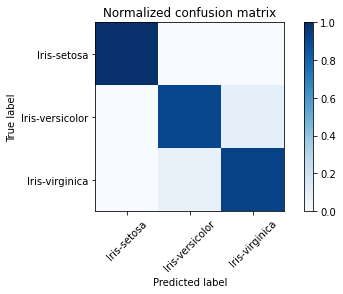

In [38]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, species, 
        title='Normalized confusion matrix')